<a href="https://colab.research.google.com/github/sam43190862-cell/-/blob/main/Random_Forest_Model_for_Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
johnsmith88_heart_disease_dataset_path = kagglehub.dataset_download('johnsmith88/heart-disease-dataset')

print('Data source import complete.')


Using Colab cache for faster access to the 'heart-disease-dataset' dataset.
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


# Basics info about the Dataset

In [3]:
df = pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.shape

(1025, 14)

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Checking Missing Values

In [8]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


Since the dataset contains no NA values we can further analyse it without any processing.

# EDA

## 1. Distribution of people with or without Heart Disease

([<matplotlib.axis.XTick at 0x7d5f2485ae70>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

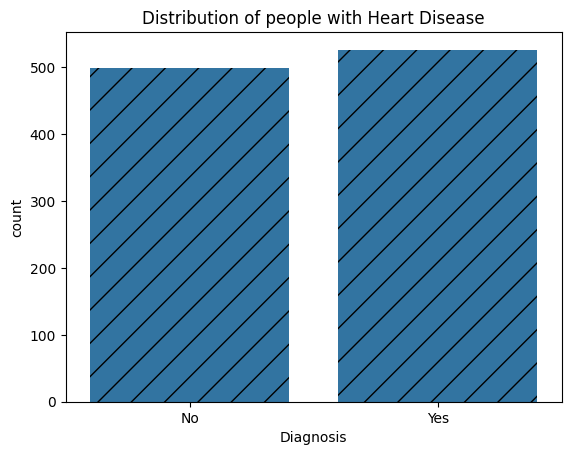

In [9]:
sns.countplot(x='target', data=df, hatch='/')
plt.title('Distribution of people with Heart Disease')
plt.xlabel('Diagnosis')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

We observe that the number of people with heart disease (~530) is slightly more than the number of people without heart disease (~500). This suggests that the dataset is almost balanced with difference between the number of people with heart disease and without heart

## 2. Correlation Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

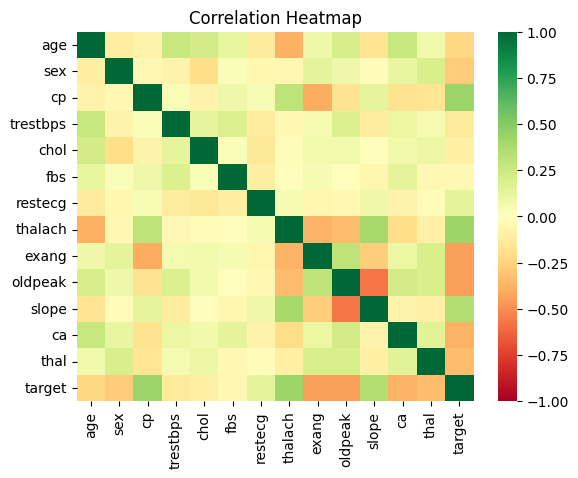

In [10]:
corr=df.corr()
sns.heatmap(corr, cmap='RdYlGn', vmin=-1, center=0)
plt.title('Correlation Heatmap')

From the correlation heatmap, features such as chest pain type (`cp`), maximum heart rate achieved (`thalach`), and `slope` show a stronger positive correlation with the target variable.
In contrast, exercise-induced angina (`exang`), ST depression (`oldpeak`), and number of major vessels (`ca`) exhibit a negative correlation with the presence of heart disease.

## 3. Distribution of Gender for Patients With and Without Heart Disease

([<matplotlib.axis.XTick at 0x7d5f24820dd0>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

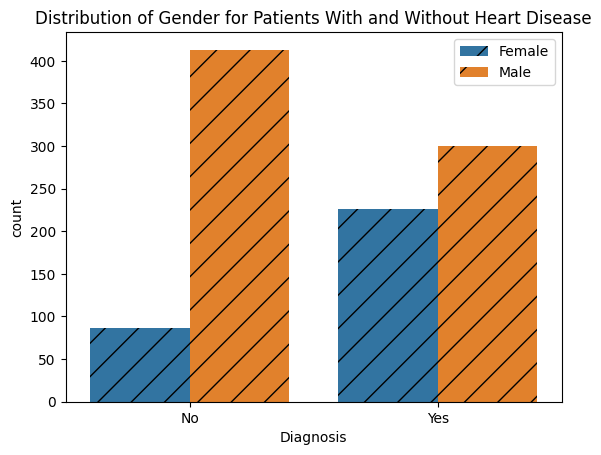

In [11]:
sns.countplot(x='target', data=df, hatch='/', hue='sex')
plt.legend(labels=['Female', 'Male'])
plt.title('Distribution of Gender for Patients With and Without Heart Disease')
plt.xlabel('Diagnosis')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

We observe that in case of people without heart disease there is a huge gap between male and female individuals with the number of male individuals being much greater than number of females whereas incase of people without heart disease the difference is not as big but still evident where still the number of males are greater than number of females with heart disease.\
This suggests that gender can become a strong factor for people without heart disease due to the large gap between females and males whereas it is not a strong factor for people with heart disease due the small difference between both gender.

## 4. Distribution of Age for Patients With and Without Heart Disease


Text(0.5, 1.0, 'Distribution of Age for Patients With and Without Heart Disease')

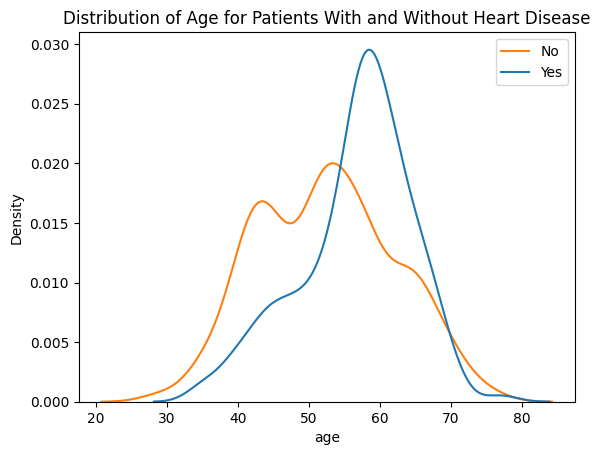

In [12]:
sns.kdeplot(x='age', data=df, hue='target')
plt.legend(labels=['No', 'Yes'])
plt.title('Distribution of Age for Patients With and Without Heart Disease')

The KDE plot compares the age distribution of patients **with** and **without** heart disease.  
It can be observed that patients diagnosed with heart disease tend to be slightly **older on average**, with a higher density around the mid-to-late age range.

However, there is a significant overlap between the two distributions, indicating that **age alone is not sufficient** to determine the presence of heart disease.  
This suggests that age should be considered alongside other clinical features for effective prediction.

# Selecting Feature and Target Variables for Model

In [13]:
x=df.drop(columns=['target'])
y=df.target

We select the `target` column as the target variable and rest of the columns as the feature variables

# Splitting Training and Test Data

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=42)

We split the training and test data in the ratio **80:20**.

# Model Building

In [15]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

# Model Prediction

In [16]:
y_pred=model.predict(x_test)

# Model Evaluation

## 1. Accuracy

In [17]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test, y_pred)
score

0.9853658536585366

The model achieves an accuracy of approximately **98.5%**, indicating strong overall performance in predicting the target variable.  
However, accuracy alone may be misleading, especially in classification problems with class imbalance.  
Therefore, additional evaluation metrics such as precision, recall, and F1-score are considered to better assess the model’s performance.


## 2. Confusion Matrix


Text(50.722222222222214, 0.5, 'Actual')

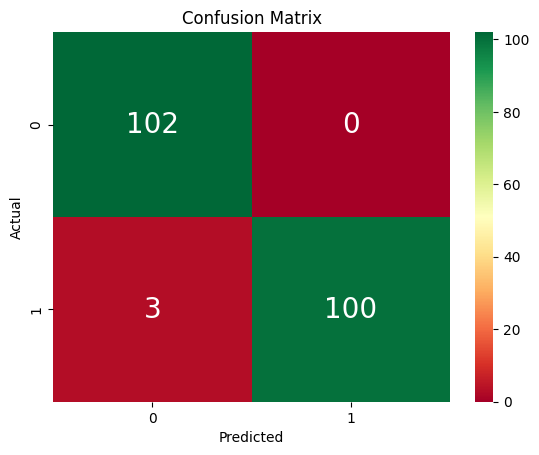

In [18]:
from sklearn.metrics import confusion_matrix
cf_mat=confusion_matrix(y_test, y_pred)
sns.heatmap(cf_mat, cmap='RdYlGn', annot=True, fmt='d',annot_kws={'fontsize':20,})
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')

From the confusion matrix we can interpret that-
* **TP:** 100
* **TN:** 102
* **FP:** 0
* **FN:** 3
  
The number of False Positives is **zero(0)** indicating that the model never falsely identifies a heart disease which is a good sign because otherwise false predicting would lead to anxiety and useless health checkups. Also the number of False Negatives is **three(3)** which is also very less considering the size of data which is critical because unidentifying an actual case of heart disease can later prove to be fatal. Overall, these results indicate that the model demonstrates strong predictive reliability and performs well across both classes.


## 3. Classification Report

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



### Classification Report Analysis

The classification report provides a detailed evaluation of the model’s performance for both classes.  
The model achieves high precision and recall for both patients with and without heart disease, indicating strong predictive capability.

The high F1-score confirms a good balance between precision and recall, while the weighted average suggests consistent performance across classes despite minor class imbalance.


# Conclusion
In this project, a machine learning approach was applied to predict the presence of heart disease using clinical and demographic features.  
Exploratory Data Analysis (EDA) helped uncover key patterns and relationships within the data, highlighting important factors such as chest pain type, maximum heart rate, and ST depression.

A Decision Tree classifier was initially trained and evaluated using multiple performance metrics including accuracy, confusion matrix, precision, recall, and F1-score.  
To improve generalization and reduce overfitting, a Random Forest classifier was subsequently implemented.

The Random Forest model demonstrated strong performance across evaluation metrics, achieving high accuracy along with a balanced precision–recall trade-off.  
The confusion matrix and classification report further confirmed the model’s ability to correctly classify both heart disease and non-heart disease cases with minimal misclassification.

Overall, this project demonstrates the effectiveness of ensemble learning techniques for medical classification tasks and emphasizes the importance of using multiple evaluation metrics beyond accuracy to assess model performance reliably.


Text(0, 0.5, 'Count')

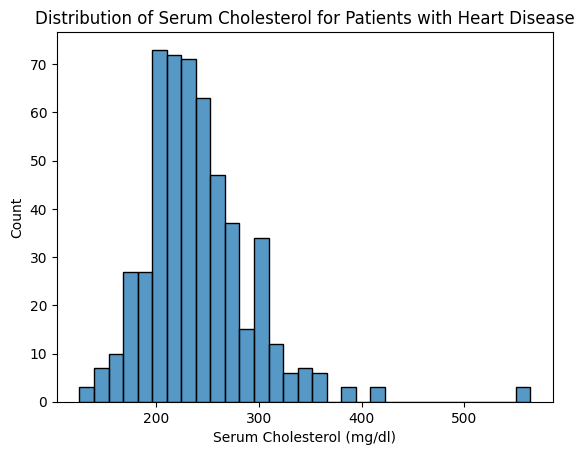

In [20]:
sns.histplot(x='chol', data=df[df['target']==1], kde=False)
plt.title('Distribution of Serum Cholesterol for Patients with Heart Disease')
plt.xlabel('Serum Cholesterol (mg/dl)')
plt.ylabel('Count')